In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate

## Cargue de datos

In [183]:
train =pd.read_csv('s3://creditdata2080/Datos/train/train.csv')

In [184]:
test = pd.read_csv('s3://creditdata2080/Datos/test/train.csv')

## Creación de pipeline

In [185]:
numeric_pipeline = Pipeline(
    [
        ('Imputacion con la media', SimpleImputer(strategy = 'mean')),
        ('Escaladominmax',MinMaxScaler())
        
    ]
)

In [186]:
categoric_pipeline = Pipeline(
    [
        ('Imputacion con la moda', SimpleImputer(strategy = 'most_frequent')),
        ('Codificar',OneHotEncoder(sparse=False))
        
    ]
)

In [187]:
column_transformer = ColumnTransformer(
    [
        ('numeric_pipeline', numeric_pipeline,[0,1,2]),
        ('categoric_pipeline',categoric_pipeline, [3,4,5])
    ])

In [188]:
features = ['Age','Credit amount', 'Duration','Sex','Purpose', 'Housing']

# Seleccion de variables


In [189]:
train = train.dropna()

In [190]:
train

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,328,31,male,2,own,little,rich,4473,36,radio/TV,good
5,597,36,male,1,own,little,moderate,4241,24,business,bad
6,7,35,male,3,rent,little,moderate,6948,36,car,good
7,951,24,male,2,own,little,little,2145,36,business,bad
10,127,30,male,2,own,little,moderate,639,12,repairs,bad
...,...,...,...,...,...,...,...,...,...,...,...
692,286,26,male,2,own,little,little,4788,48,car,good
693,729,36,male,2,own,rich,rich,1275,24,business,good
694,747,37,female,1,own,little,little,1274,12,car,bad
695,73,41,female,1,own,little,moderate,5954,42,business,good


In [191]:
X_train = train.drop(['Risk','Unnamed: 0'], axis=1)
y_train = train['Risk']
y_train_tranform = (y_train == 'good').astype('int')

In [192]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [193]:
X_train = pd.get_dummies(X_train)

In [194]:
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,31,2,4473,36,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
5,36,1,4241,24,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,35,3,6948,36,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,24,2,2145,36,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10,30,2,639,12,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,26,2,4788,48,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
693,36,2,1275,24,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
694,37,1,1274,12,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
695,41,1,5954,42,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [195]:
#importancia de las variables a traves de arbol de decisión
model = DecisionTreeClassifier()

In [196]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [197]:
model.feature_importances_

array([0.12760609, 0.04626751, 0.33539122, 0.2001855 , 0.01221884,
       0.01025807, 0.02470355, 0.0056199 , 0.02584371, 0.01211881,
       0.01958451, 0.02800838, 0.        , 0.02786016, 0.0149864 ,
       0.01798369, 0.0056199 , 0.046674  , 0.        , 0.00760165,
       0.01039064, 0.01280089, 0.00827658, 0.        ])

In [198]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

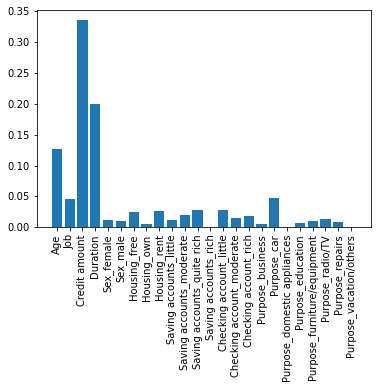

In [199]:
plt.bar(x = X_train.columns, height = model.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

In [200]:
#para ordenar
order_columns = X_train.columns[np.argsort(model.feature_importances_)[::-1]]

In [201]:
order_importance = np.sort(model.feature_importances_)[::-1]

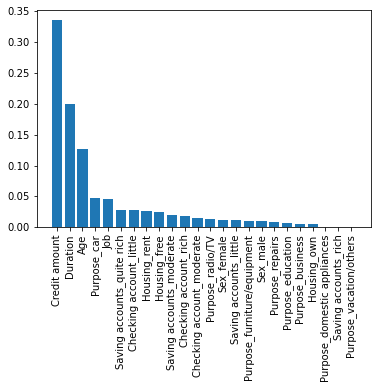

In [202]:
plt.bar(x = order_columns, height = order_importance)
plt.xticks(rotation = 90)
plt.show()

In [203]:
#importancia de variables con regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [204]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

In [205]:
model = LogisticRegression()

In [206]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [207]:
model.coef_

array([[ 0.47424606,  0.46040332, -0.92624159, -2.03116232, -0.19687034,
         0.19696162,  0.06881668,  0.14613817, -0.21486357, -0.46689979,
        -0.41031105,  0.29891103,  0.57839108, -0.38283643, -0.16388134,
         0.54680905,  0.28173634,  0.11494351, -0.14531633, -0.93147024,
         0.17853055,  0.27162217,  0.07962265,  0.15042262]])

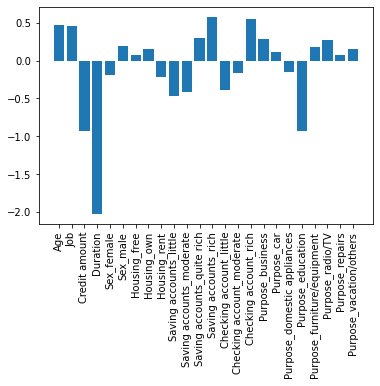

In [208]:
plt.bar(x = X_train.columns, height = model.coef_[0])
plt.xticks(rotation = 90)
plt.show()

In [240]:
final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',DecisionTreeClassifier(max_depth=3) )
        
    ]
)

In [241]:
X_train = train[features]

In [242]:
results = cross_validate(final_pipeline, X_train, y_train_tranform,
                        cv = 10, return_train_score =True,
                        scoring = ['accuracy','f1'])

In [243]:
print("train: ",results["train_accuracy"].mean(), "+-",results["train_accuracy"].std())
print("val: ",results["test_accuracy"].mean(), "+-",results["test_accuracy"].std())

train:  0.6743570750237416 +- 0.010504688830760682
val:  0.6313063063063064 +- 0.07450946849313422


In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [252]:
final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',RandomForestClassifier(max_depth=3) )
        
    ]
)

In [254]:
results = cross_validate(final_pipeline, X_train, y_train_tranform,
                        cv = 10, return_train_score =True,
                        scoring = ['accuracy','f1'])

In [255]:
print("train: ",results["train_accuracy"].mean(), "+-",results["train_accuracy"].std())
print("val: ",results["test_accuracy"].mean(), "+-",results["test_accuracy"].std())

train:  0.6965204178537512 +- 0.00940099108021672
val:  0.6372372372372372 +- 0.05794006165373083


## Ajuste de hiperparametros


In [256]:
#randomforest

final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',RandomForestClassifier(max_depth=3) )
        
    ]
)

In [259]:
results = cross_validate(final_pipeline, X_train, y_train_tranform,
                        cv = 10, return_train_score =True,
                        scoring = ['accuracy','f1'])

In [260]:
from sklearn.model_selection import GridSearchCV

In [261]:
#probar con 50, 100 y 200 arboles y altura = 2,3,5,10
grid={'n_estimators': [ 50,100,200],'max_depth':[2,3,5,10] }

In [267]:
X_transformed = column_transformer.fit_transform(X_train)

In [268]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = grid, cv=10, scoring= 'accuracy')

In [269]:
grid_search.fit(X_transformed, y_train_tranform)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [270]:
grid_search.best_score_

0.6508258258258259

In [271]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 100}

## Entrenamiento final

In [272]:
final_pipeline = Pipeline(
    [ 
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)',RandomForestClassifier(max_depth=5,n_estimators = 100) )
        
    ]
)

In [275]:
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Pipeline de preprocesamiento',
                 ColumnTransformer(transformers=[('numeric_pipeline',
                                                  Pipeline(steps=[('Imputacion '
                                                                   'con la '
                                                                   'media',
                                                                   SimpleImputer()),
                                                                  ('Escaladominmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2]),
                                                 ('categoric_pipeline',
                                                  Pipeline(steps=[('Imputacion '
                                                                   'con la '
                                                                   'moda',
                        

In [276]:
joblib.dump(final_pipeline, 'modelrf.joblib')

['modelrf.joblib']